In [1]:
from upsetplot import UpSet
from upsetplot import from_memberships
from upsetplot import plot
from matplotlib import pyplot as plt
import pandas as pd

# Elysia Genome
## Against all 5 conditions

In [2]:
tpmfile = '../../../../figshare/gene_expression/lengthScaledTPM.matrix'
hqgenefile = '../../../../figshare/annotation/genes/high_quality_geneset.txt'

In [3]:
hqgeneSet = set()

fi = open(hqgenefile)

for line in fi:
    gene = line.rstrip()
    #print(gene)
    hqgeneSet.add(gene)
    
fi.close()

In [8]:
# Read TPM expression file
fi = open(tpmfile)

countDict = {}
df = pd.DataFrame(columns=['stages','gene set'])

juvslugcount = 0

for line in fi:
    col = line.rstrip().split('\t')
    if col[0] == 'AS1':
        continue
    
    gene = col.pop(0)
    
    col = [float(i) for i in col]
    
    #print(gene)
    
    jslug = sum(col[0:3]) / 3
    algae = sum(col[3:6]) /3
    egg = sum(col[6:9]) /3
    vel = sum(col[12:]) / 3
    lslug = sum(col[9:12]) / 3
    #print(gene,lslug)
    
    catList = []
    if egg > 1:
        catList.append('egg')

    if vel > 1:
        catList.append('veliger')

    if lslug > 1:
        catList.append('larva')

    if jslug > 1:
        catList.append('juv slug')

    catTuple = tuple(catList)
    categories = ','.join(catList)
    
    if gene in hqgeneSet:
        df.loc[len(df.index)] = [categories, 'B high quality'] 
        if categories == 'juv slug':
            juvslugcount += 1
        
    else:
        df.loc[len(df.index)] = [categories, 'A low quality'] 
    
    if catTuple not in countDict:
        countDict[catTuple] = 0
        
    countDict[catTuple] += 1
    
    
fi.close()

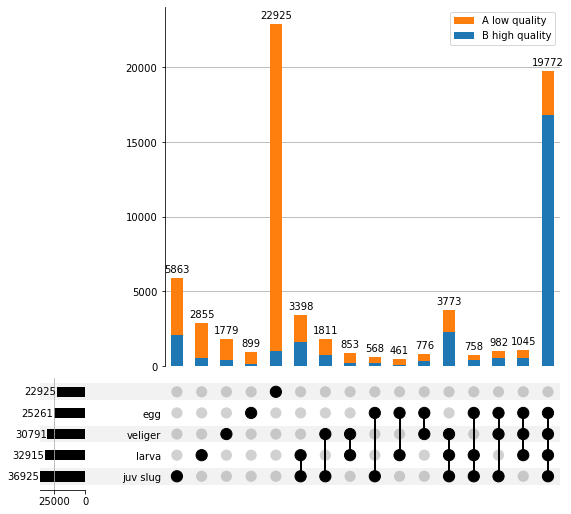

In [6]:
exp_by_stage = from_memberships(df.stages.str.split(','), data=df)

upset = UpSet(exp_by_stage, show_counts=True, intersection_plot_elements=0)
upset.add_stacked_bars(by="gene set", elements=15)
upset.plot()
figure = plt.gcf()
figure.savefig('Elysia_geneexp_byquality_upset_plot_v2.pdf', format='pdf')